In [ ]:
dd

In [1]:
# hide
%load_ext nb_black
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True

<IPython.core.display.Javascript object>

# Introduction

# Step 0. Get some data
[There are many different kinds](https://pytorch.org/docs/stable/torchvision/datasets.html) of picture data ready to use in pytorch. As an example we'll use the easy to learn and visualize MINST data. This collection of handwritten digits is a classic example in ML. For a long while this was a "hard" problem to learn. Now, it is very easy. 

All data in torch comes with a [standard interface](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

You always need to load train/test sets seperatly, as we show below. (If this is your first time running this notebook, the data you need should be downloaded for you). 

In [ ]:
from torchvision import datasets, transforms
from torchvision.datasets import MNIST
from torchvision.datasets import FashionMNIST

In [ ]:
train_dataset = MNIST(
    "data/", download=True, train=True, transform=transforms.ToTensor()
)
test_dataset = MNIST(
    "data/", train=False, transform=transforms.ToTensor()
)

# Step 1. Train the model

In [ ]:
from newremagine.core import train
from newremagine.core import plot_latent
from newremagine.core import plot_test

In [49]:
fraction = [0.1, 0.8, 0.1]
model, memory, loss = train(
    fraction,
    train_dataset,
    num_episodes=1000,
    batch_size=8,
    num_burn=16,
    lr=0.001,
    perfect=True,
)
loss

1249.827392578125

<IPython.core.display.Javascript object>

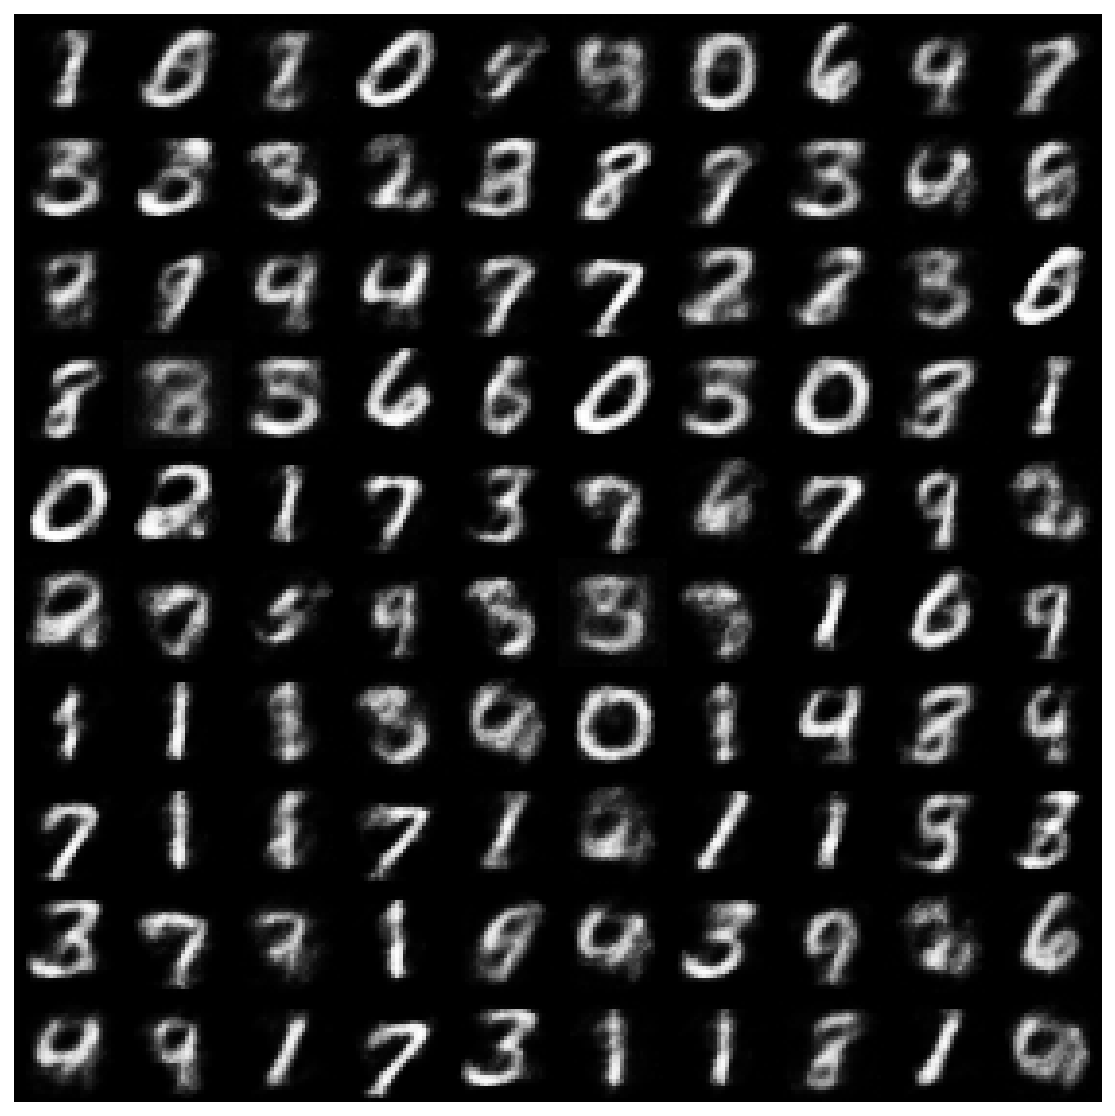

<IPython.core.display.Javascript object>

In [50]:
plot_test(train_dataset, model, 10)

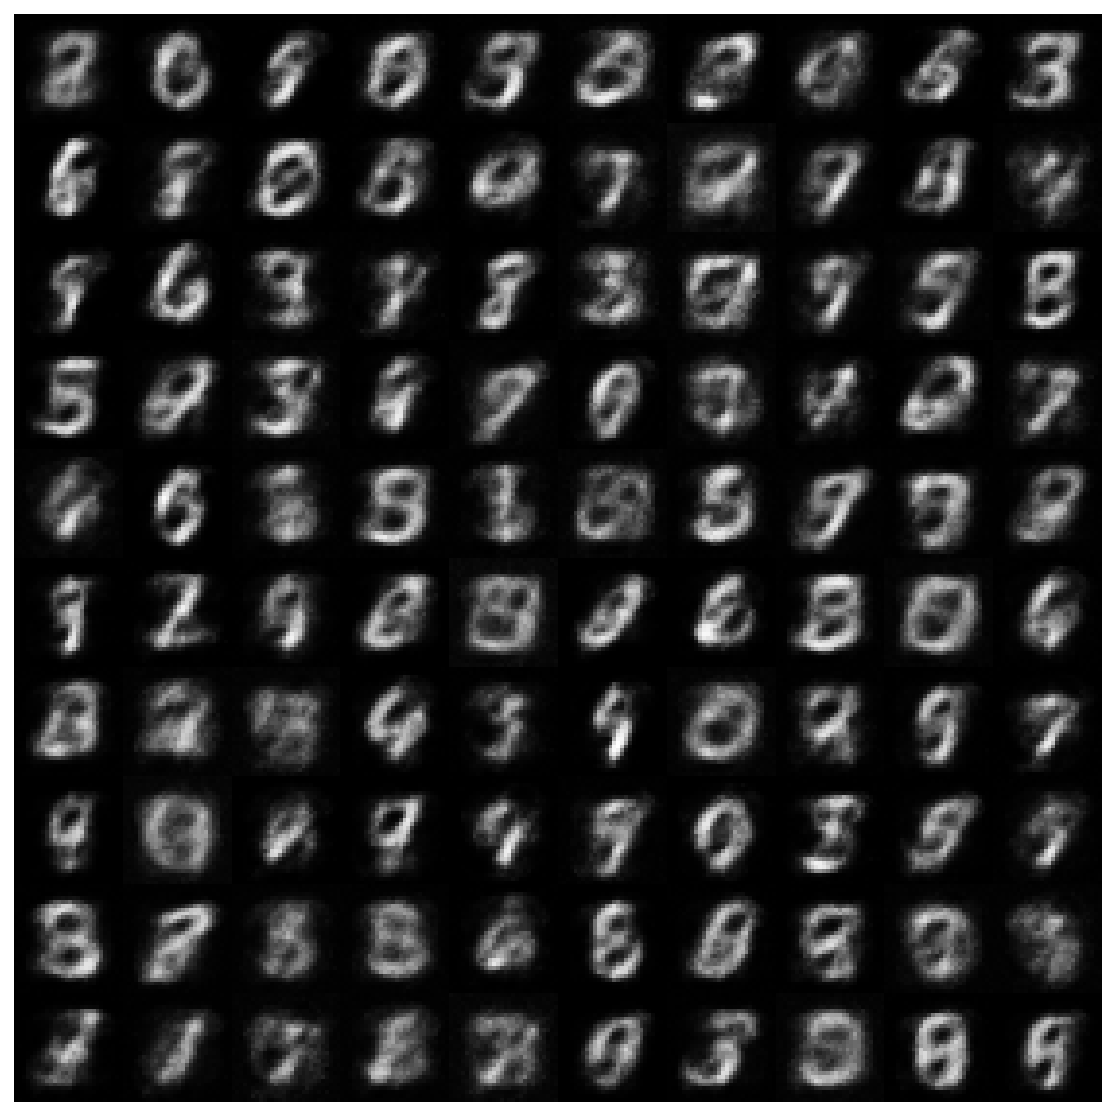

<IPython.core.display.Javascript object>

In [52]:
plot_latent(model, 10)

## Sidebar: perfect and imperfect replay
Replay in a ML model is just a copy of the original data. But biological learners don't by and large get to keep a perfect copy of everything they have ever seen. This means that when they replay memories they must use their own imperfect reconstructions of what they saw.

The `newreimagine.core.train` function has an option that tries to approximate this real limitation. To try using imperfect replay, set the perfect flag to false. For exmaple:

In [55]:
fraction = [0.1, 0.8, 0.1]
model, memory, loss = train(
    fraction,
    train_dataset,
    num_episodes=1000,
    batch_size=8,
    num_burn=16,
    lr=0.001,
    perfect=False,  # <--- !
)
loss

1867.572021484375

<IPython.core.display.Javascript object>

# Step 2. Test the VAE

In [ ]:
from newremagine.core import test

In [8]:
# test
test(model, test_dataset)

1608187.662700653

<IPython.core.display.Javascript object>

# Step 3. Visualize

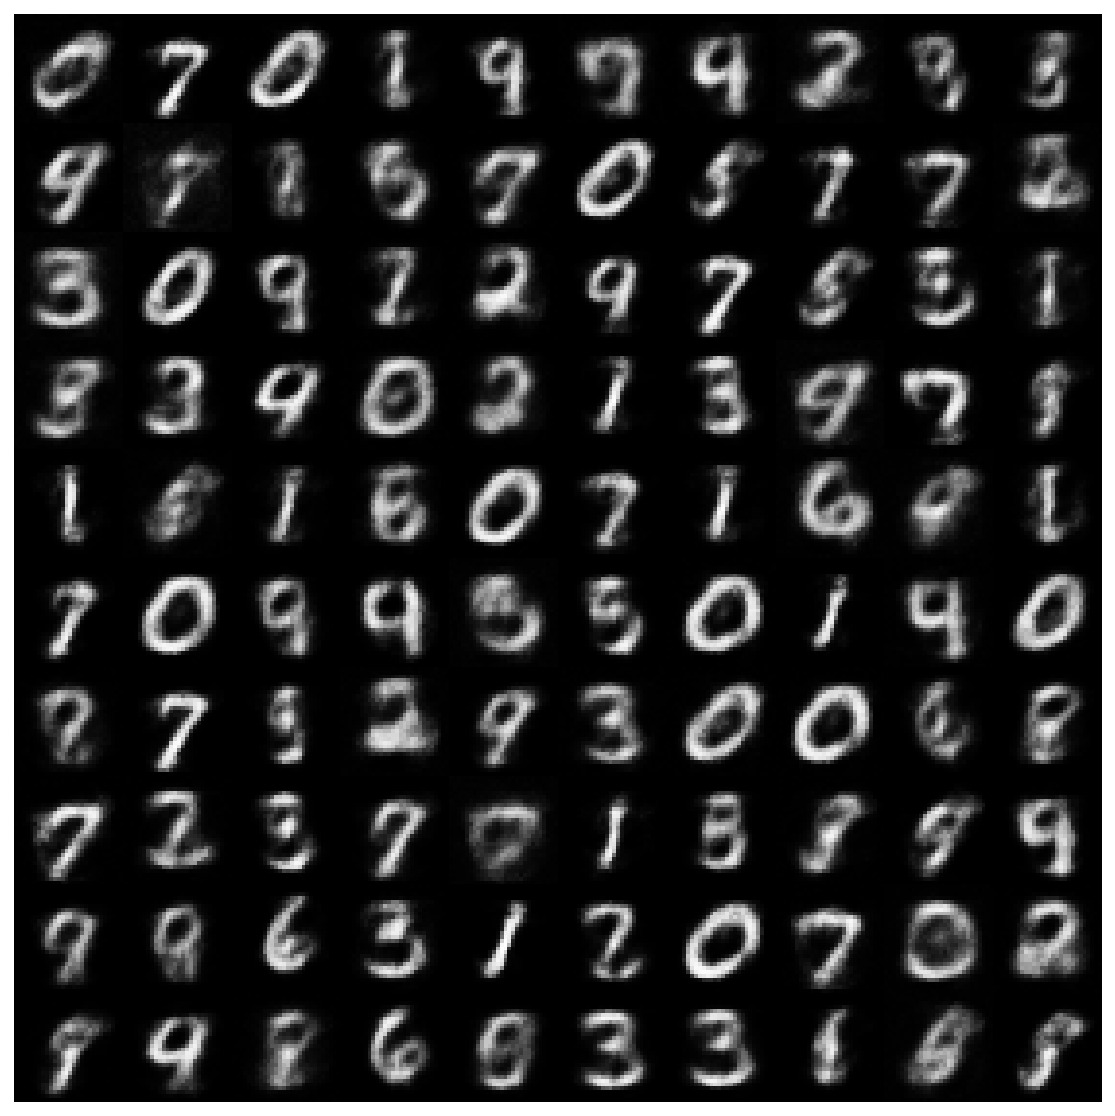

<IPython.core.display.Javascript object>

In [9]:
plot_test(test_dataset, model, 10)

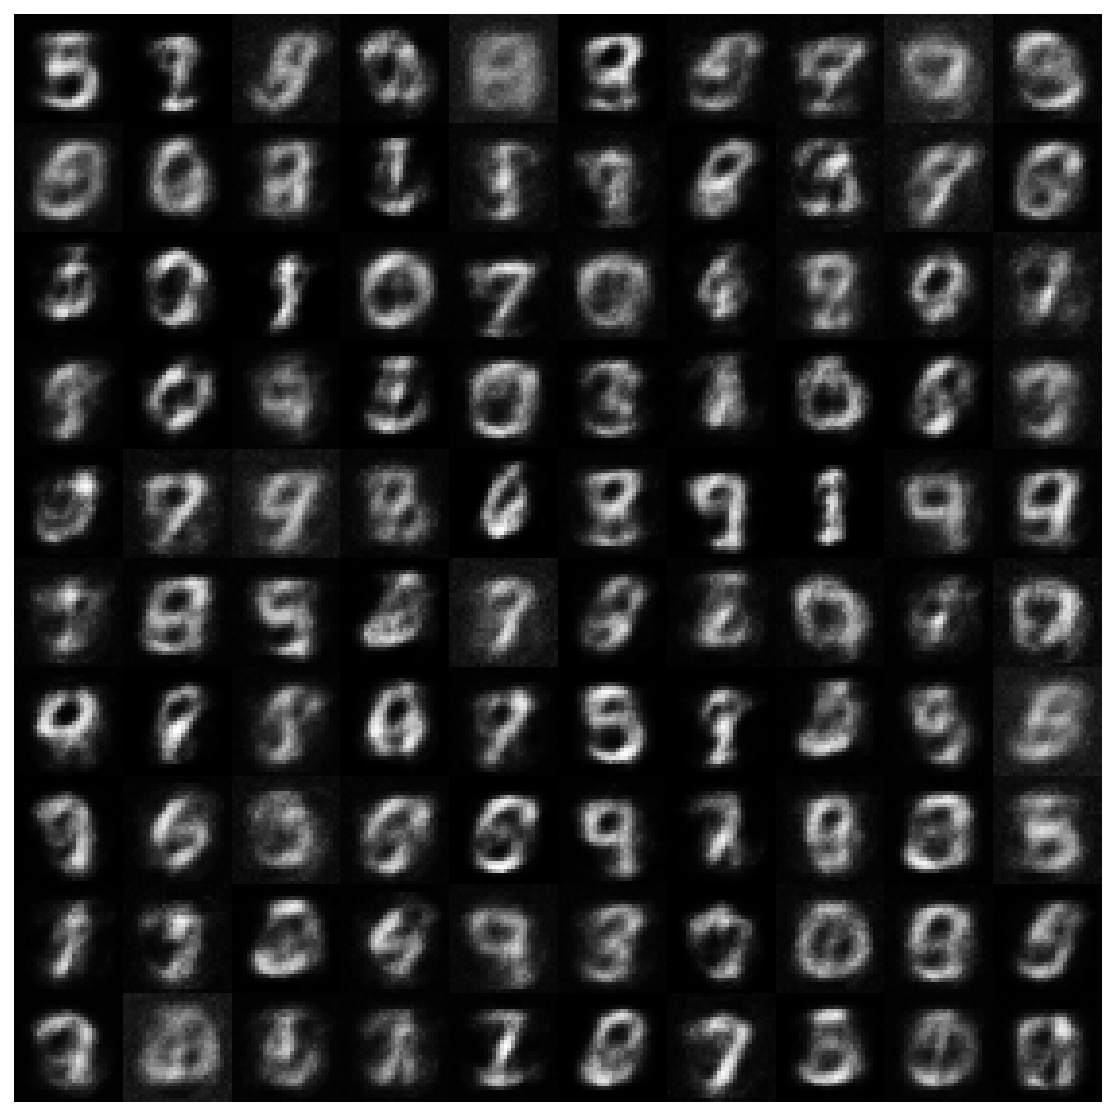

<IPython.core.display.Javascript object>